# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

In [1]:
import pandas as pd
df = pd.read_csv('blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [2]:
print(df.head())
print(df.info())

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [3]:
print(df['Labels'].value_counts())

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Labels'>

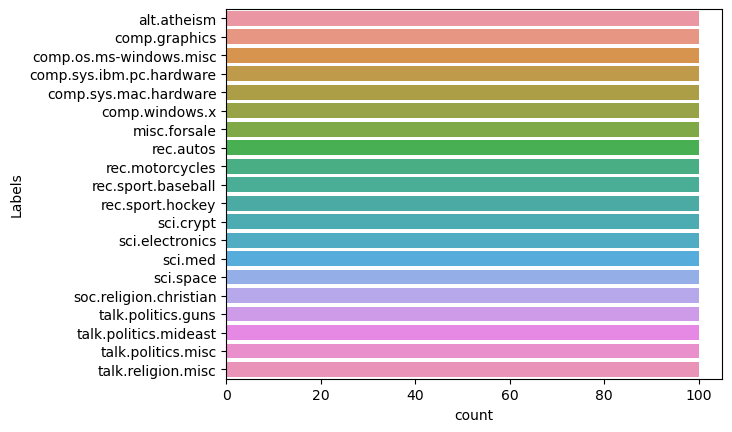

In [4]:
import seaborn as sns
import nltk
sns.countplot(y='Labels', data=df)

In [5]:
df['Cleaned_Text'] = df['Data'].str.lower()

In [6]:
df['Cleaned_Text'] = df['Cleaned_Text'].str.replace('[^\w\s]', '', regex=True)

In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ROSHIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\ROSHIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\ROSHIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\ROSHIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\ROSHIT\AppData\Roaming\nltk_data

[nltk_data]    |   Package maxent_treebank_pos_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package moses_sample to
[nltk_data]    |     C:\Users\ROSHIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\ROSHIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\ROSHIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\ROSHIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\ROSHIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    

[nltk_data]    |   Package tagsets_json is already up-to-date!
[nltk_data]    | Downloading package timit to
[nltk_data]    |     C:\Users\ROSHIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     C:\Users\ROSHIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\ROSHIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\ROSHIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\ROSHIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:

True

In [9]:
from nltk.tokenize import word_tokenize

df['Tokenized_Text'] = df['Cleaned_Text'].apply(word_tokenize)

In [10]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['Filtered_Text'] = df['Tokenized_Text'].apply(lambda x: [word for word in x if word not in stop_words])


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Filtered_Text'].apply(lambda x: ' '.join(x)))

In [11]:
from sklearn.model_selection import train_test_split

X = df['Cleaned_Text']  # Features
y = df['Labels']         # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Define a pipeline for text classification
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

# Train the classifier
text_clf.fit(X_train, y_train)

# Make predictions
y_pred = text_clf.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, accuracy_score

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.53      0.94      0.68        18
           comp.graphics       0.74      0.78      0.76        18
 comp.os.ms-windows.misc       1.00      0.73      0.84        22
comp.sys.ibm.pc.hardware       0.88      0.60      0.71        25
   comp.sys.mac.hardware       0.81      0.62      0.70        21
          comp.windows.x       1.00      0.56      0.72        25
            misc.forsale       1.00      0.44      0.62        18
               rec.autos       0.94      0.89      0.91        18
         rec.motorcycles       0.86      0.75      0.80        16
      rec.sport.baseball       0.79      0.83      0.81        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.62      0.95      0.75        19
         sci.electronics       0.44      0.69      0.54        16
                 sci.med       0.81      0.76      0.79        17
         

In [14]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ROSHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment polarity
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return 'Positive'
    elif sentiment['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each blog post
df['Sentiment'] = df['Data'].apply(get_sentiment)

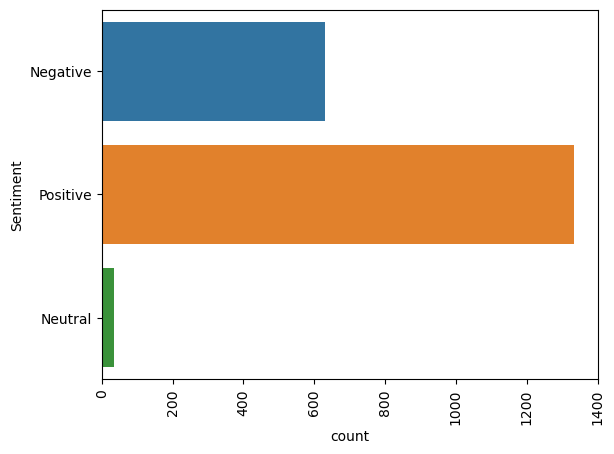

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.countplot(x='Labels', data=df)
sns.countplot( y='Sentiment', data=df)
plt.xticks(rotation=90)
plt.show()

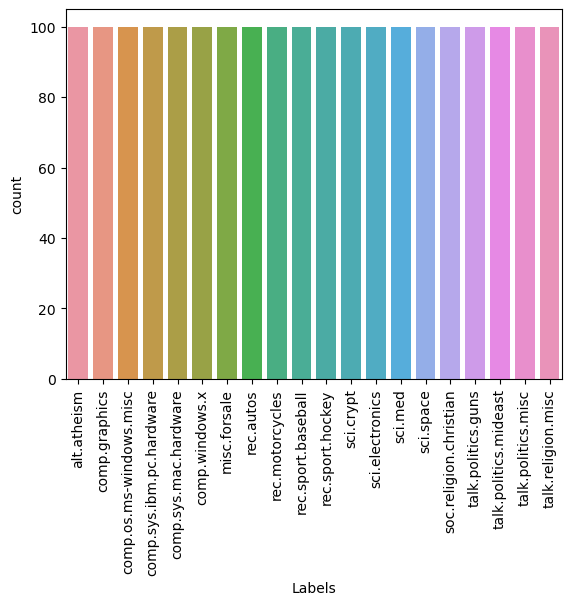

In [17]:
sns.countplot(x='Labels', data=df)
plt.xticks(rotation=90)
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.72
Precision: 0.81863146065595
Recall: 0.72
F1-score: 0.7238959863858199
